In [7]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
def parseXmlFile(xmlFile):
  # Funtion to take in an .xml file as a parameter
  # and iterates over the children of the ElementTree
  # looking for a Title attribute. If found it stores
  # the string associated with the title attribute
  # in the titleWordsList. Once it has iterated over
  # the entire file it returns the list.
  #
  # xmlFile : string -> string represenation of xml file path
  #
  # titleWords : list -> result list that stores all words
  # found within a rows Title attribute

  tree = ET.parse(xmlFile)
  root = tree.getroot()

  titleWords = []

  for child in root:
    attribute = child.attrib
    if 'Title' in attribute:
      titleWords.append(attribute['Title'])
  
  return titleWords

In [9]:
def tokenizeWithStopWords(sentenceList):
  # Function to take a list of sentences and
  # return a list of tokenized words leveraging
  # NLTK libraries word_tokenize.
  #
  # sentenceList : list -> List of sentence strings
  #           passed as a parmeter
  #
  # tokensList : list -> returned list of word tokens
  tokensList = []
  
  for sentence in sentenceList:
    tokensList.extend(word_tokenize(sentence))

  tokensList = [word.lower() for word in tokensList]

  return tokensList

In [10]:
def tokenizeWithoutStopWords(tokenList):
  # Function that will take a list of word
  # tokens, generate a set of stop words
  # by leveraging NLTK library. It will then
  # generate a new list by checking the passed
  # parameter list against the set of stop 
  # words. If a stop word is found it is removed
  # from the word token list.
  #
  # tokenList : list -> list of word tokens passed
  #       as a parameter
  #
  # stopWordsRemoved : list -> returned list of word
  #           tokens with stop words removed

  stopWords = set(stopwords.words('english'))

  stopWordsRemoved = [word for word in tokenList if word not in stopWords]

  return stopWordsRemoved

In [11]:
def generateWordCloud(words):
  # Function to generate a word cloud using pythons word cloud generator.
  # It takes a dictionary of the top 20 found words and their frequencies.
  # It then uses matplotlib library to plot the generated word cloud.
  #
  # words : dictionary -> dictionary of the 20 most frequent words and their
  #         frequencies
  wordcloud = WordCloud(width=800, height=400, background_color ='white',
                        min_font_size = 14).generate_from_frequencies(words)
  plt.figure(figsize=(30, 20))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

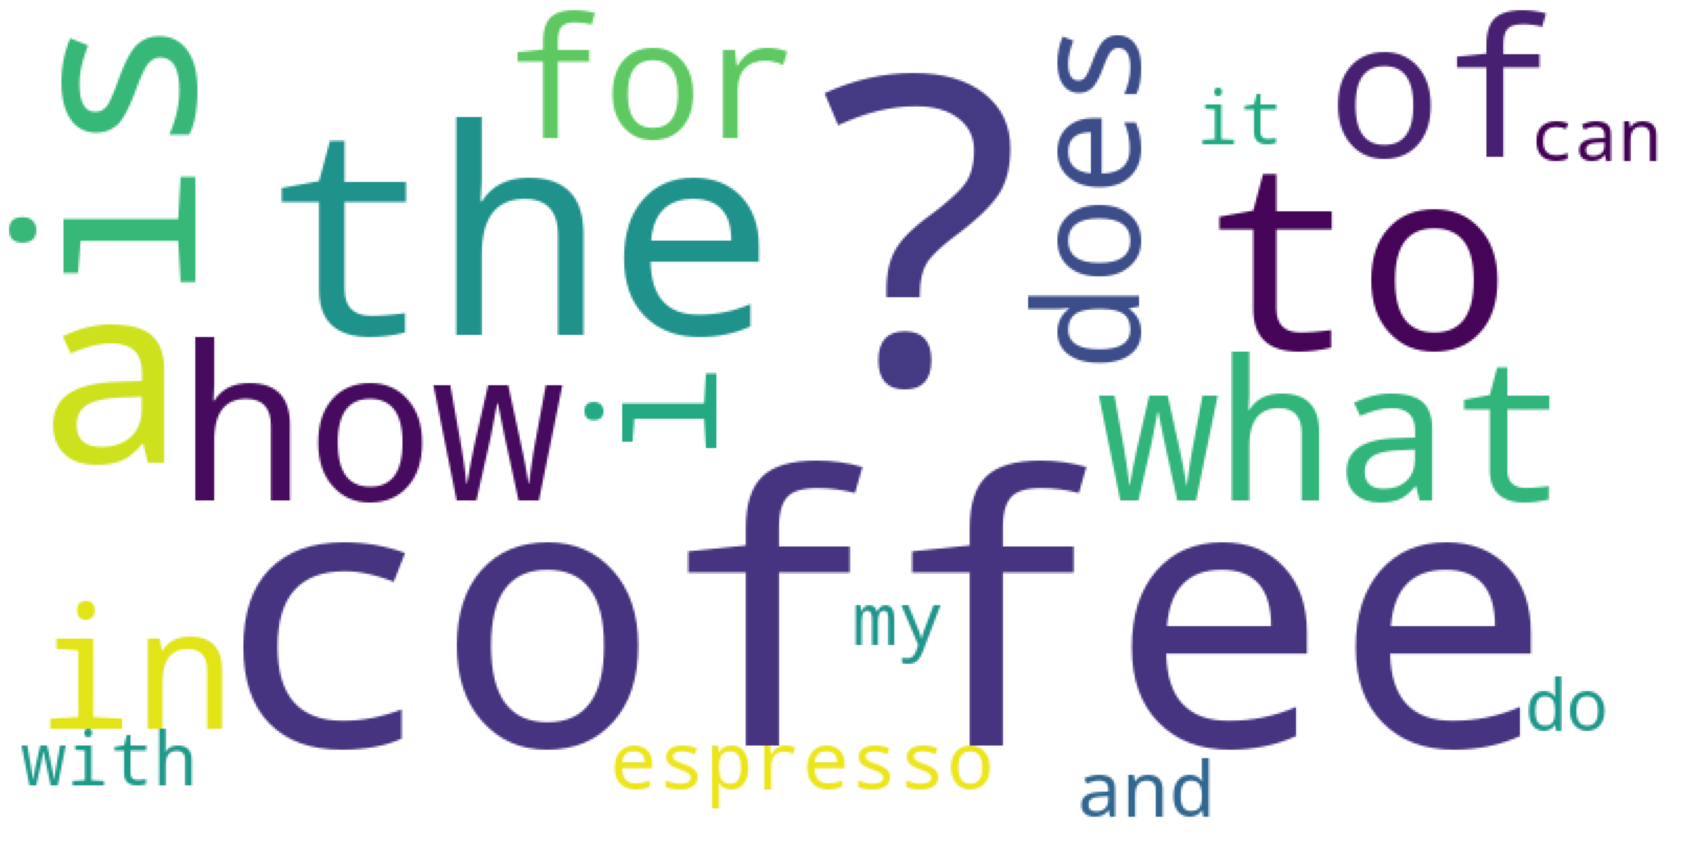

In [12]:
titleWords = parseXmlFile('/content/Posts_Coffee.xml')
tokensWithStopWords = tokenizeWithStopWords(titleWords)
tokensWithoutStopWords = tokenizeWithoutStopWords(tokensWithStopWords)
#Get top 20 tokens and their frequencies in dictionary format to pass to word cloud function
top20Tokens = dict(Counter(tokensWithStopWords).most_common(20))
#Get top 20 tokens without stopwords and their frequencies in dictionary format to pass to word cloud function
top20TokensWOSW = dict(Counter(tokensWithoutStopWords).most_common(20))

generateWordCloud(top20Tokens)

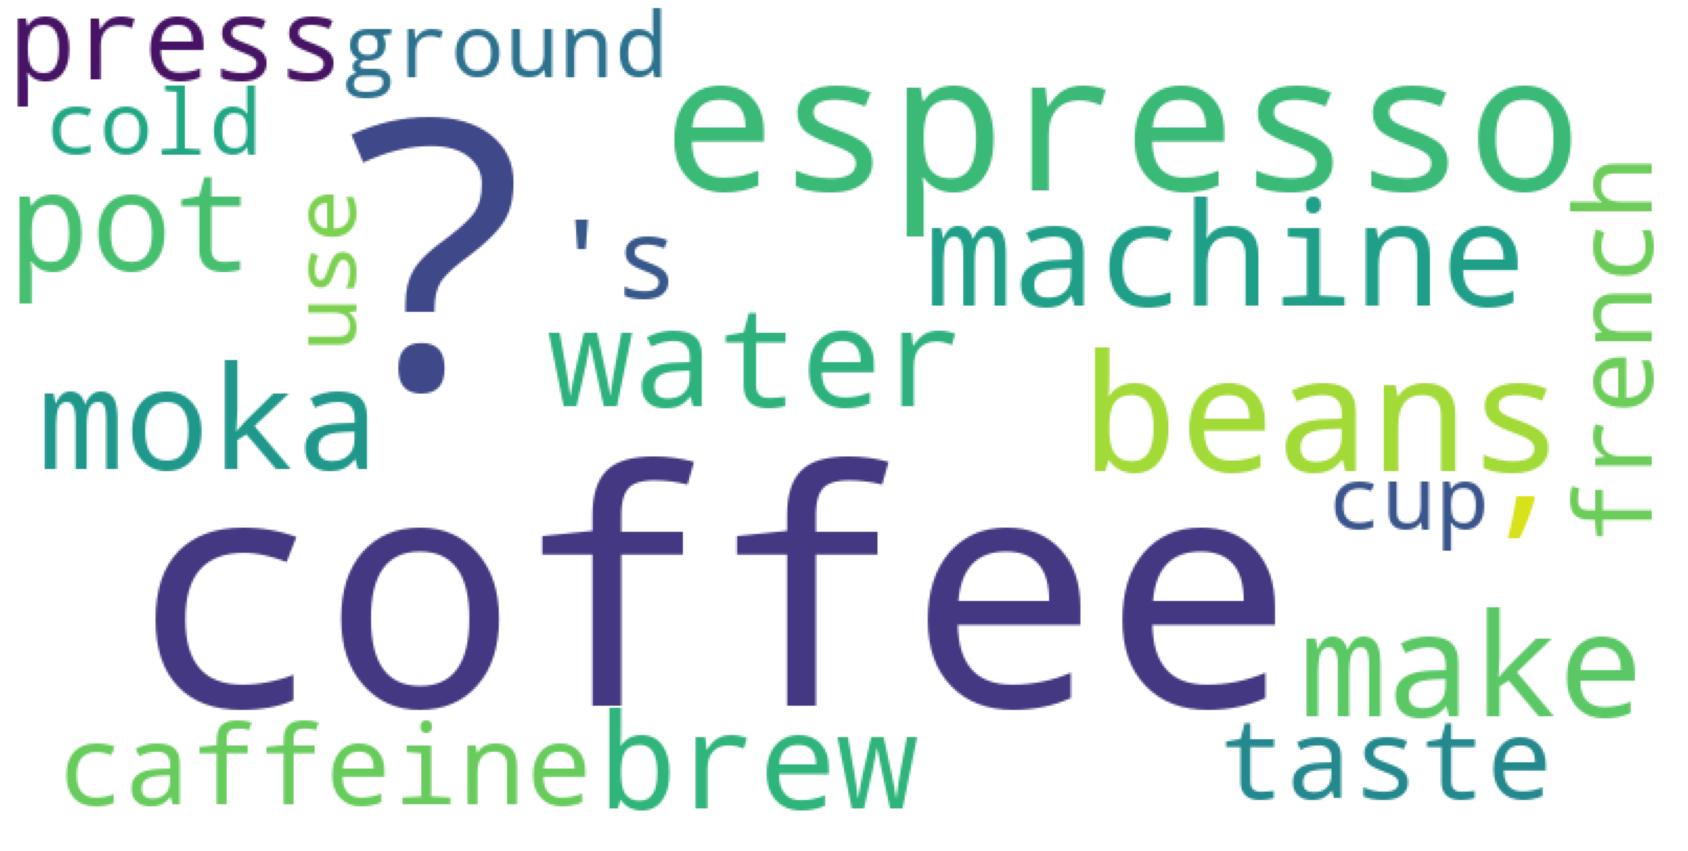

In [13]:
generateWordCloud(top20TokensWOSW)